# L'objectif des "compare" est d'évaluer la qualité des calages effectués. Ils comparent les dépenses ou quantités agrégées de Budget des Familles après calage, avec celles de la comptabilité nationale. Les calages sont ici effectués sur les dépenses en carburants.

# Import de modules généraux

In [15]:
from __future__ import division

import pkg_resources
import os
import pandas as pd
from pandas import concat
import seaborn


# Import de modules spécifiques à Openfisca

In [16]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_line

# Import d'une nouvelle palette de couleurs

In [17]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Import des fichiers csv donnant les montants agrégés des quantités consommées répertoriées dans les enquêtes BdF. Ces montants sont calculés dans compute_quantite_carburants


In [18]:
assets_directory = os.path.join(
    pkg_resources.get_distribution('openfisca_france_indirect_taxation').location
    )

quantite_bdf = pd.DataFrame()
produits = ['carburants', 'diesel', 'essence']
for element in produits:
    quantite = pd.DataFrame.from_csv(os.path.join(assets_directory,
            'openfisca_france_indirect_taxation', 'assets', 'quantites',
            'quantites_{}_consommees_bdf.csv'.format(element)), sep = ',', header = -1)
    quantite.rename(columns = {1: '{} bdf'.format(element)}, inplace = True)
    quantite.index = quantite.index.str.replace('en milliers de m3 en ', '')
    quantite = quantite.sort_index()
    quantite_bdf = concat([quantite, quantite_bdf], axis = 1)


# Import des fichiers csv donnant les quantités agrégées d'après les Comptes du Transport.

In [20]:
quantite_carbu_vp_france = pd.read_csv(os.path.join(assets_directory,
        'openfisca_france_indirect_taxation', 'assets', 'quantites',
        'quantite_carbu_vp_france.csv'), sep = ';')
quantite_carbu_vp_france['Unnamed: 0'] = quantite_carbu_vp_france['Unnamed: 0'].astype(str)
quantite_carbu_vp_france = quantite_carbu_vp_france.set_index('Unnamed: 0')
quantite_carbu_vp_france.rename(columns = {'essence': 'essence agregat'}, inplace = True)
quantite_carbu_vp_france.rename(columns = {'diesel': 'diesel agregat'}, inplace = True)
quantite_carbu_vp_france['carburants agregat'] = quantite_carbu_vp_france.sum(axis = 1)

comparaison_bdf_agregats = concat([quantite_carbu_vp_france, quantite_bdf], axis = 1)
comparaison_bdf_agregats = comparaison_bdf_agregats.dropna()


# Création des graphiques pour comparer les consommations obtenues via Bdf vis-à-vis de la comptabilité nationale

Comparaison pour l essence


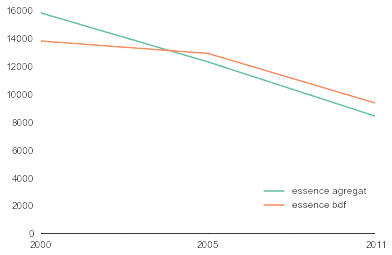

Comparaison pour le diesel


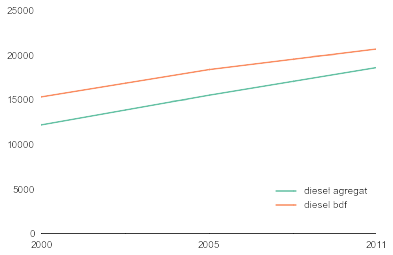

Comparaison sur l ensemble des carburants


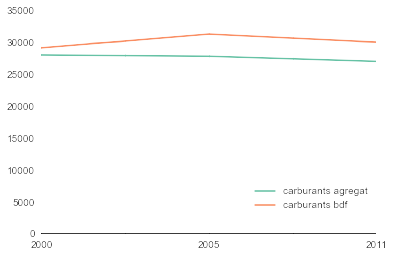

In [21]:
print 'Comparaison pour l essence'
graph_builder_line(comparaison_bdf_agregats[['essence agregat'] + ['essence bdf']])
print 'Comparaison pour le diesel'
graph_builder_line(comparaison_bdf_agregats[['diesel agregat'] + ['diesel bdf']])
print 'Comparaison sur l ensemble des carburants'
graph_builder_line(comparaison_bdf_agregats[['carburants agregat'] + ['carburants bdf']])
